In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/mvsla/OneDrive/Documents/GitHub/Book_llm/google_books_api_dataset/Google_books_api_dataset.csv')
df.head()

,Unnamed: 0,Title,Authors,Publisher,Published Date,Description,Categories,Page Count,Average Rating,Ratings Count,Language,Ratings Count\t
0,0,Antiques Roadshow Collectibles,Carol Prisant,Workman Publishing,2003-01-01,"Offers tips on identifying, collecting, and ca...",Antiques & Collectibles,660.0,4.187366,0,en,0
1,1,Dog Antiques and Collectibles,Patricia Robak,Schiffer Military History Book,1999,A remarkable array of accessible and affordabl...,Pets,0.0,4.187366,0,en,0
2,2,How to Sell Antiques and Collectibles on eBay....,"Dennis L. Prince, Lynn Dralle",McGraw Hill Professional,2004-11-15,Dennis Prince teams up with antique and collec...,Business & Economics,257.0,4.187366,0,en,0
3,3,Buying & Selling Antiques & Collectibl,"Don Bingham, Joan Bingham",Tuttle Publishing,2012-08-28,Written for both beginners and experienced col...,Antiques & Collectibles,254.0,4.187366,0,en,0
4,4,Maloney's Antiques and Collectibles Resource D...,"David J. Maloney, Jr.",Antique Trader,1995-08,The singular resource that contains contact in...,Antiques & Collectibles,526.0,4.187366,0,en,0


In [3]:
category_count=df['Categories'].value_counts()
category_count

Categories
Unknown Genre                                   38470
Fiction                                         13096
Education                                        9998
Business & Economics                             9334
History                                          6862
                                                ...  
Chronically ill children                            1
Crab Orchard National Wildlife Refuge (Ill.)        1
Parent and child                                    1
Childlessness                                       1
Alien abduction                                     1
Name: count, Length: 11593, dtype: int64

In [4]:
df['Categories'].nunique()

11593

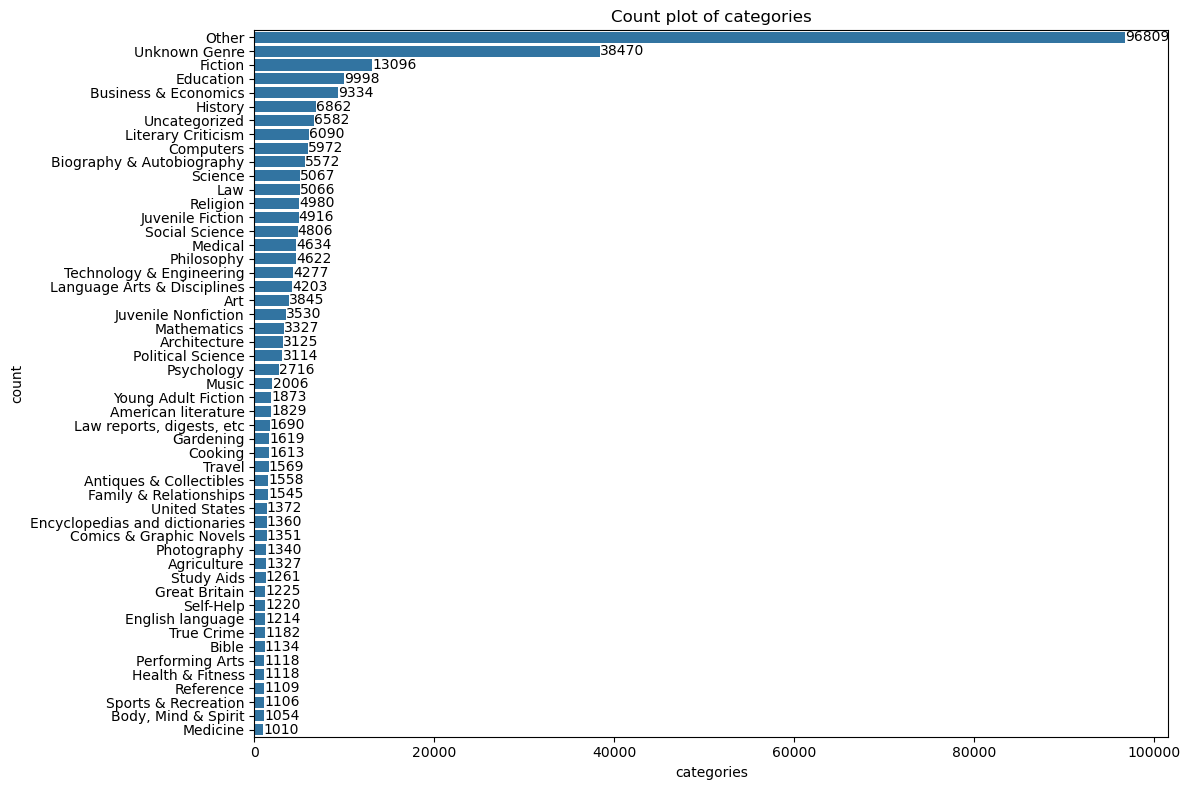

In [15]:
threshold = 500  # Set a threshold for grouping rare categories
category_counts = df['Categories'].value_counts()
df['Categories'] = df['Categories'].apply(lambda x: x if category_counts[x] > threshold else 'Other')
plt.figure(figsize=(12,8))
ax=sns.countplot(y='Categories',data=df,order=df['Categories'].value_counts().index)
for bar in ax.patches:
    plt.text(
        bar.get_width() + 10,               # Position to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Vertically center the text
        f'{int(bar.get_width())}',          # Format the count as an integer
        va='center',                        # Align vertically
        fontsize=10                         # Text size
    )
plt.xlabel('categories')
plt.ylabel('count')
plt.title('Count plot of categories')
plt.tight_layout()
plt.show()

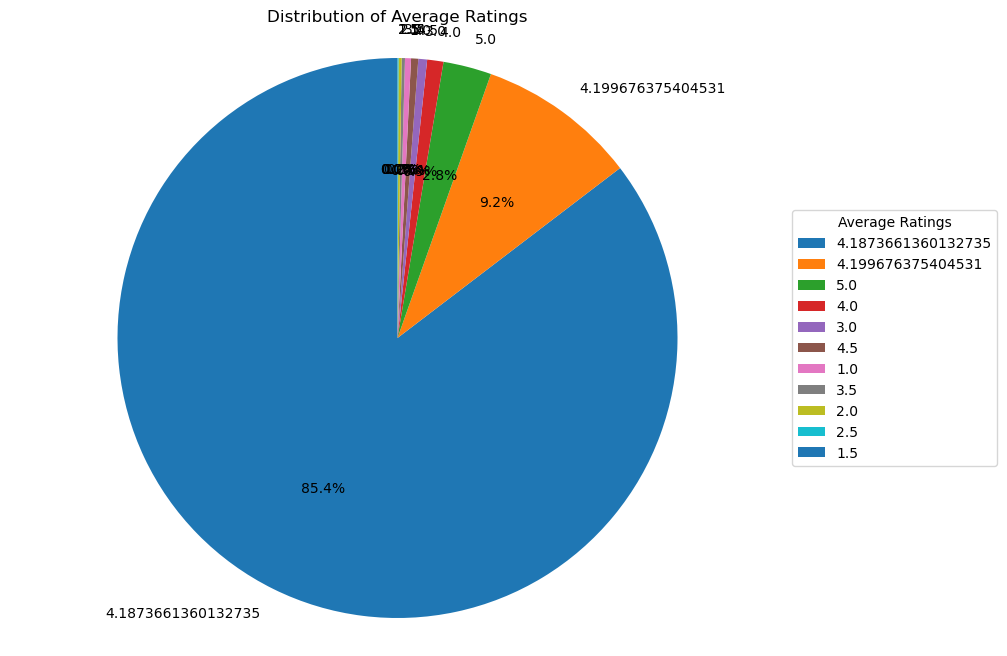

In [20]:
plt.figure(figsize=(10, 8))
average_rating_counts = df['Average Rating'].value_counts()
plt.pie(average_rating_counts, labels=average_rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Average Ratings')
# Enhance visibility of labels
plt.legend(title="Average Ratings", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')
plt.show()

In [21]:
average_rating_counts = df['Average Rating'].value_counts(normalize=True) * 100
average_rating_counts

Average Rating
4.187366    85.379157
4.199676     9.206377
5.000000     2.785901
4.000000     0.936944
3.000000     0.506037
4.500000     0.413387
1.000000     0.345332
3.500000     0.188332
2.000000     0.180246
2.500000     0.048852
1.500000     0.009433
Name: proportion, dtype: float64

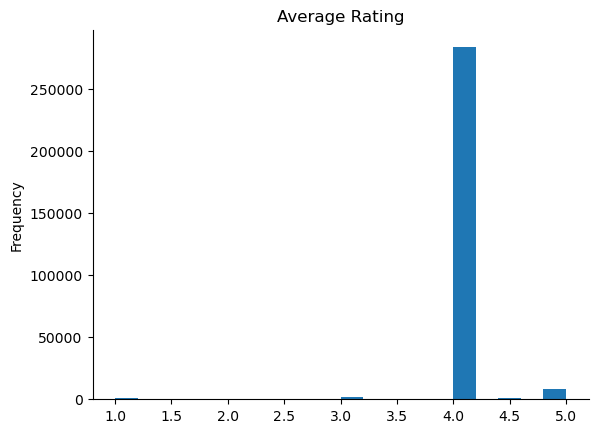

In [23]:
df['Average Rating'].plot(kind='hist', bins=20, title='Average Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

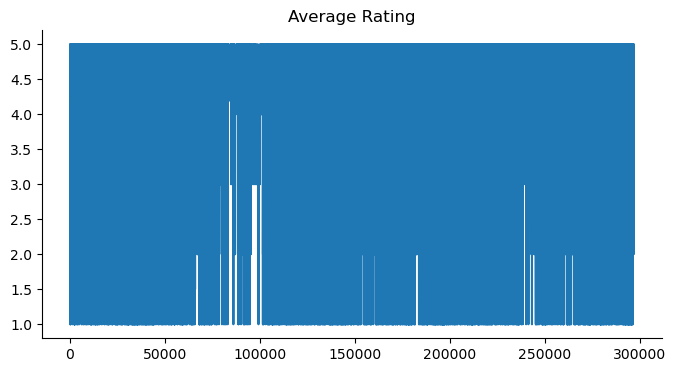

In [26]:
df['Average Rating'].plot(kind='line', figsize=(8, 4), title='Average Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

In [1]:
import tensorflow as tf
# Specify the GPU to use
physical_devices = tf.config.list_physical_devices('GPU')

In [2]:
physical_devices

[]

In [3]:
print(tf.__version__)

2.18.0
